# 1. Creación de Folderes train, test y val

In [ ]:
#dataset obtenido de:
#https://www.kaggle.com/andrewmvd/lung-and-colon-cancer-histopathological-images

In [149]:
import warnings
import os
import shutil
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('lung_colon_image_set')
print(data_dir_list)
path, dirs, files = next(os.walk("lung_colon_image_set"))
file_count = len(files)


['colon_image_sets', 'lung_image_sets']


In [150]:
data_dir_list = os.listdir('lung_colon_image_set/colon_image_sets')
print(data_dir_list)


['colon_aca', 'colon_n']


In [151]:
#sacando los subfolders de las clases al folder original y eliminado la carpeta que los contiene
shutil.move('lung_colon_image_set/colon_image_sets/colon_aca', 'lung_colon_image_set')
shutil.move('lung_colon_image_set/colon_image_sets/colon_n', 'lung_colon_image_set')
os.rmdir('lung_colon_image_set/colon_image_sets')

In [152]:
data_dir_list = os.listdir('lung_colon_image_set/lung_image_sets')
print(data_dir_list)


['lung_aca', 'lung_n', 'lung_scc']


In [153]:
#sacando los subfolders de las clases al folder original y eliminado la carpeta que los contiene
shutil.move('lung_colon_image_set/lung_image_sets/lung_aca', 'lung_colon_image_set')
shutil.move('lung_colon_image_set/lung_image_sets/lung_n', 'lung_colon_image_set')
shutil.move('lung_colon_image_set/lung_image_sets/lung_scc', 'lung_colon_image_set')

os.rmdir('lung_colon_image_set/lung_image_sets')

In [154]:
data_dir_list = os.listdir('lung_colon_image_set')
print(data_dir_list)
path, dirs, files = next(os.walk("lung_colon_image_set"))
file_count = len(files)

['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']


* colon_aca:Colon adenocarcinoma
* colon_n: Colon benign tissue
* lung_aca:Lung adenocarcinoma
* lung_n:Lung benign tissue
* lung_scc:Lung squamous cell carcinoma

In [155]:
#se creara una carpeta que contenga las imagenes separadas en los tres sets
dataset_dir = 'lung_colon_image_set'
base_dir = 'dataset_lung_colon'
os.mkdir(base_dir)

In [156]:
#creación de tres  folders (train , test and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#test con carpetas
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#test sin carpetas
test_cnf_dir = os.path.join(base_dir, 'test_cnf')
os.mkdir(test_cnf_dir)

#Under train folder create five folders 
# (colon_aca, folly, lung_aca, lung_n, lung_scc)

train_colon_aca_dir = os.path.join(train_dir, 'colon_aca')
os.mkdir(train_colon_aca_dir)

train_colon_n_dir = os.path.join(train_dir, 'colon_n')
os.mkdir(train_colon_n_dir)

train_lung_aca_dir = os.path.join(train_dir, 'lung_aca')
os.mkdir(train_lung_aca_dir)

train_lung_n_dir = os.path.join(train_dir, 'lung_n')
os.mkdir(train_lung_n_dir)

train_lung_scc_dir = os.path.join(train_dir, 'lung_scc')
os.mkdir(train_lung_scc_dir)

#Under validation folder create five folders 
# (colon_aca, folly, lung_aca, lung_n, lung_scc)

validation_colon_aca_dir = os.path.join(validation_dir, 'colon_aca')
os.mkdir(validation_colon_aca_dir)

validation_colon_n_dir = os.path.join(validation_dir, 'colon_n')
os.mkdir(validation_colon_n_dir)

validation_lung_aca_dir = os.path.join(validation_dir, 'lung_aca')
os.mkdir(validation_lung_aca_dir)

validation_lung_n_dir = os.path.join(validation_dir, 'lung_n')
os.mkdir(validation_lung_n_dir)

validation_lung_scc_dir = os.path.join(validation_dir, 'lung_scc')
os.mkdir(validation_lung_scc_dir)


#Under test folder create five folders 
# (colon_aca, folly, lung_aca, lung_n, lung_scc)

test_colon_aca_dir = os.path.join(test_dir, 'colon_aca')
os.mkdir(test_colon_aca_dir)

test_colon_n_dir = os.path.join(test_dir, 'colon_n')
os.mkdir(test_colon_n_dir)

test_lung_aca_dir = os.path.join(test_dir, 'lung_aca')
os.mkdir(test_lung_aca_dir)

test_lung_n_dir = os.path.join(test_dir, 'lung_n')
os.mkdir(test_lung_n_dir)

test_lung_scc_dir = os.path.join(test_dir, 'lung_scc')
os.mkdir(test_lung_scc_dir)


In [157]:
def split_data(SOURCE, TRAINING, VALIDATION,TEST, test_cnf, SPLIT_SIZE_TRAINING,SPLIT_SIZE_VALIDATION):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE_TRAINING)
    valid_length = int(len(files) * SPLIT_SIZE_VALIDATION)
    test_length = int(len(files) - (training_length + valid_length))
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    rangeVal = training_length + valid_length
    valid_set = shuffled_set[training_length:rangeVal]
    test_set = shuffled_set[rangeVal:]
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        shutil.move(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        shutil.move(this_file, destination)
    
    #todo en una carpeta
    for filename in test_set:
        this_file = SOURCE + filename
        destination = test_cnf + filename
        copyfile(this_file, destination)
    
    #test separado por carpetas
    for filename in test_set:
        this_file = SOURCE + filename
        destination = TEST + filename
        shutil.move(this_file, destination)

In [158]:
#se hace dos carpetas de test, ya que una es donde estan separados po0r capetas de la clase y la otra estan toda en una carpeta
#de la cual se creara un csv y se obtendra una matrix de confusion
COLON_ACA_SOURCE_DIR = 'lung_colon_image_set/colon_aca/'
TRAINING_COLON_ACA_DIR = 'dataset_lung_colon/train/colon_aca/'
VALID_COLON_ACA_DIR = 'dataset_lung_colon/validation/colon_aca/'
test_COLON_ACA_DIR = 'dataset_lung_colon/test/colon_aca/'
test_cnf_COLON_ACA_DIR = 'dataset_lung_colon/test_cnf/'

COLON_N_SOURCE_DIR = 'lung_colon_image_set/colon_n/'
TRAINING_COLON_N_DIR = 'dataset_lung_colon/train/colon_n/'
VALID_COLON_N_DIR = 'dataset_lung_colon/validation/colon_n/'
test_COLON_N_DIR = 'dataset_lung_colon/test//colon_n/'
test_cnf_COLON_N_DIR = 'dataset_lung_colon/test_cnf/'


LUNG_ACA_SOURCE_DIR = 'lung_colon_image_set/lung_aca/'
TRAINING_LUNG_ACA_DIR = 'dataset_lung_colon/train/lung_aca/'
VALID_LUNG_ACA_DIR = 'dataset_lung_colon/validation/lung_aca/'
test_LUNG_ACA_DIR = 'dataset_lung_colon/test/lung_aca/'
test_cnf_LUNG_ACA_DIR = 'dataset_lung_colon/test_cnf/'

LUNG_N_SOURCE_DIR = 'lung_colon_image_set/lung_n/'
TRAINING_LUNG_N_DIR = 'dataset_lung_colon/train/lung_n/'
VALID_LUNG_N_DIR = 'dataset_lung_colon/validation/lung_n/'
test_LUNG_N_DIR = 'dataset_lung_colon/test/lung_n/'
test_cnf_LUNG_N_DIR = 'dataset_lung_colon/test_cnf/'


LUNG_SCC_SOURCE_DIR = 'lung_colon_image_set/lung_scc/'
TRAINING_LUNG_SCC_DIR = 'dataset_lung_colon/train/lung_scc/'
VALID_LUNG_SCC_DIR = 'dataset_lung_colon/validation/lung_scc/'
test_LUNG_SCC_DIR = 'dataset_lung_colon/test/lung_scc/'
test_cnf_LUNG_SCC_DIR = 'dataset_lung_colon/test_cnf/'

In [160]:
import os
import random
import shutil
from shutil import copyfile

SPLIT_SIZE_TRAINING = .60
SPLIT_SIZE_VALIDATION = .20


split_data(COLON_ACA_SOURCE_DIR, TRAINING_COLON_ACA_DIR, VALID_COLON_ACA_DIR,
           test_COLON_ACA_DIR,test_cnf_COLON_ACA_DIR,SPLIT_SIZE_TRAINING,SPLIT_SIZE_VALIDATION)

split_data(COLON_N_SOURCE_DIR, TRAINING_COLON_N_DIR, VALID_COLON_N_DIR,
          test_COLON_N_DIR,test_cnf_COLON_ACA_DIR,SPLIT_SIZE_TRAINING,SPLIT_SIZE_VALIDATION)

split_data(LUNG_ACA_SOURCE_DIR, TRAINING_LUNG_ACA_DIR, VALID_LUNG_ACA_DIR,
          test_LUNG_ACA_DIR,test_cnf_COLON_N_DIR,SPLIT_SIZE_TRAINING,SPLIT_SIZE_VALIDATION)

split_data(LUNG_N_SOURCE_DIR, TRAINING_LUNG_N_DIR, VALID_LUNG_N_DIR,
          test_LUNG_N_DIR,test_cnf_LUNG_ACA_DIR,SPLIT_SIZE_TRAINING,SPLIT_SIZE_VALIDATION)

split_data(LUNG_SCC_SOURCE_DIR, TRAINING_LUNG_SCC_DIR, VALID_LUNG_SCC_DIR,
          test_LUNG_SCC_DIR,test_cnf_LUNG_SCC_DIR,SPLIT_SIZE_TRAINING,SPLIT_SIZE_VALIDATION)

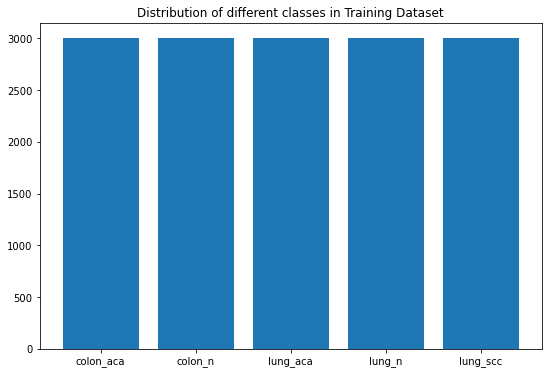

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = data_dir_list
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('dataset_lung_colon/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [42]:
for i in data_dir_list:
    print('Training {} images are: '.format(i)+str(len(os.listdir('dataset_lung_colon/train/'+i+'/'))))

Training colon_aca images are: 3000
Training colon_n images are: 3000
Training lung_aca images are: 3000
Training lung_n images are: 3000
Training lung_scc images are: 3000


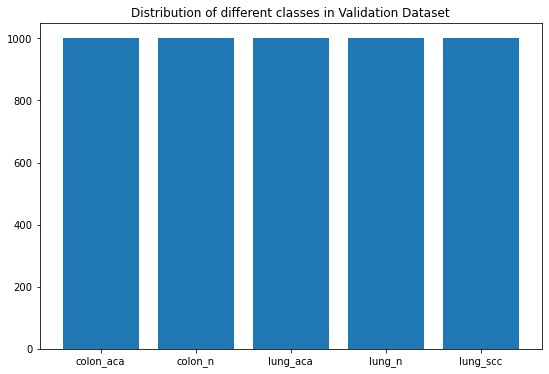

In [43]:
image_folder = data_dir_list
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('dataset_lung_colon/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [44]:
model = Sequential()for i in data_dir_list:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('dataset_lung_colon/validation/'+i+'/'))))

Valid colon_aca images are: 1000
Valid colon_n images are: 1000
Valid lung_aca images are: 1000
Valid lung_n images are: 1000
Valid lung_scc images are: 1000


# 2. Preprocesamiento

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

In [2]:
#utilizamos el generador el cual se va aencargart de rescalar las imagenes
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.4, zoom_range = 0.4, horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
#se esta cambaindo el tamaño de las figuras a 224,224, de 32 imagenes en 32 imagenes y se le esta aplicando la rescala anteriormente definida
#esto se hace tanto para train como para el val, asi mismo se le esta indicando que son categorias
training_set = train_datagen.flow_from_directory("dataset_lung_colon/train/", target_size = (224, 224), batch_size = 32, class_mode = "categorical")

Found 15000 images belonging to 5 classes.


In [4]:
val_set = val_datagen.flow_from_directory("dataset_lung_colon/validation/", target_size = (224, 224), batch_size = 32, class_mode = "categorical")

Found 5000 images belonging to 5 classes.


In [5]:
model = Sequential() #se define el modelio

In [6]:
#le agregamos la capa de conv2d, 16 filtros, 2 pixeles por 2 y la funcion de activacion relu. Le ponemos tamaño de 224, 224 y de 3 por el rgb
model.add(Conv2D(filters = 16, kernel_size = 2, padding = "same", activation = "relu", input_shape = (224, 224, 3)))
#hacemos un pooling de 2x2, es decir va agarrar pixeles de las imagenes de dos en dos y va a formar otro pixeles con los seleccionados
model.add(MaxPooling2D(pool_size = 2))
#le agregamos la capa de conv2d, 32 filtros, 2 pixeles por 2 y la funcion de activacion relu. Le ponemos tamaño de 224, 224 y de 3 por el rgb
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
#le agregamos la capa de conv2d, 64 filtros, 2 pixeles por 2 y la funcion de activacion relu. Le ponemos tamaño de 224, 224 y de 3 por el rgb
model.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
#le agregamos la capa de conv2d, 128 filtros, 2 pixeles por 2 y la funcion de activacion relu. Le ponemos tamaño de 224, 224 y de 3 por el rgb
model.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

# 3 Comienzo de la Red Neuronal

In [7]:
#neuronas de entrada input layer, los pixeles los convertimos a un solo arreglo, el cual es nuestro input layer
model.add(Flatten())

In [161]:
#hidden layer, en la primera layer se utilizara 500 neuronas con la funcion de activación relu. Se crea 2 hidden layer
model.add(Dense(500, activation = "relu"))
model.add(Dense(500, activation = "relu"))

In [9]:
#capa dse salida, como hay 5 clases, esas son el numero de neuronas de salida, con la funcion de activación softmax debido a que es 
#recomendable utilizarla en la capa de salida
model.add(Dense(5, activation = "softmax"))

In [10]:
#compilar y declaamos funcion de perdida, nuestro optimizador adam el cual nos permitira adaptar nuestro learning dentro del
#modelo rate y la metrica deseada que deseamos que mida
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [11]:
#hacemos el fit del modelo con 30 epochs
r = model.fit_generator(training_set, validation_data = val_set, epochs = 30, steps_per_epoch = len(training_set), validation_steps = len(val_set))

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
469/469 [==============================] - 319s 678ms/step - loss: 0.7819 - accuracy: 0.6372 - val_loss: 0.3902 - val_accuracy: 0.8274
Epoch 2/30
469/469 [==============================] - 299s 636ms/step - loss: 0.3487 - accuracy: 0.8513 - val_loss: 0.2368 - val_accuracy: 0.9022
Epoch 3/30
469/469 [==============================] - 298s 636ms/step - loss: 0.2208 - accuracy: 0.9123 - val_loss: 0.1775 - val_accuracy: 0.9318
Epoch 4/30
469/469 [==============================] - 298s 634ms/step - loss: 0.1922 - accuracy: 0.9242 - val_loss: 0.2841 - val_accuracy: 0.8920
Epoch 5/30
469/469 [==============================] - 296s 632ms/step - loss: 0.1783 - accuracy: 0.9288 - val_loss: 0.2399 - val_accuracy: 0.9204
Epoch 6/30
469/469 [==============================] - 298s 636ms/step - loss: 0.1428 - accuracy: 0.9455 - val_loss: 0.2205 - val_accuracy: 0.9126
Epoch 7/30
469/469 [==============================] - 298s 636ms/step - loss: 0.1182 - accuracy: 0.9540 - val_loss: 0.1343 -

observamos que en el epoch 30 tiene un acuraccy de 0.9813  y una perdida de  0.0587. En el set de validación observamos una perdida de 0.0532 y un accuracy de 0.9820. Vemos los graficos para saber como a mejorado o empeorado el modelo

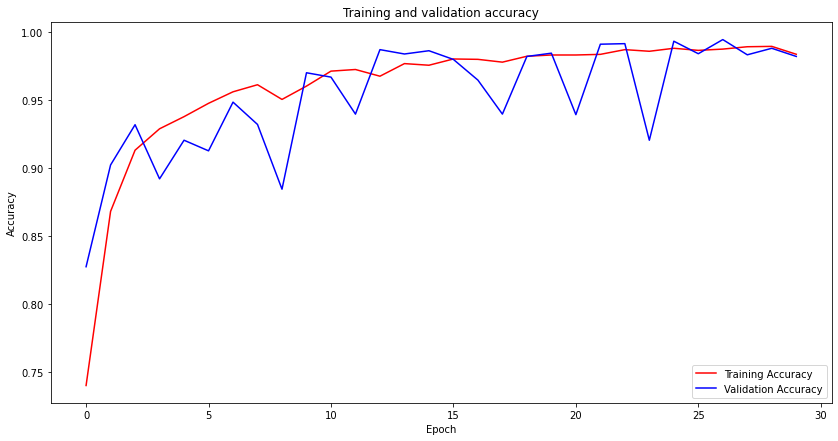

In [13]:
import matplotlib.pyplot as plt
acc=r.history['accuracy']
val_acc=r.history['val_accuracy']
loss=r.history['loss']
val_loss=r.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

vemos que el accuracy de trainning es constante más el accuracy del validdation sube y cae teniendo la mayor caida en el epcoh 8 y 23

Text(0.5, 1.0, 'Training and validation loss')

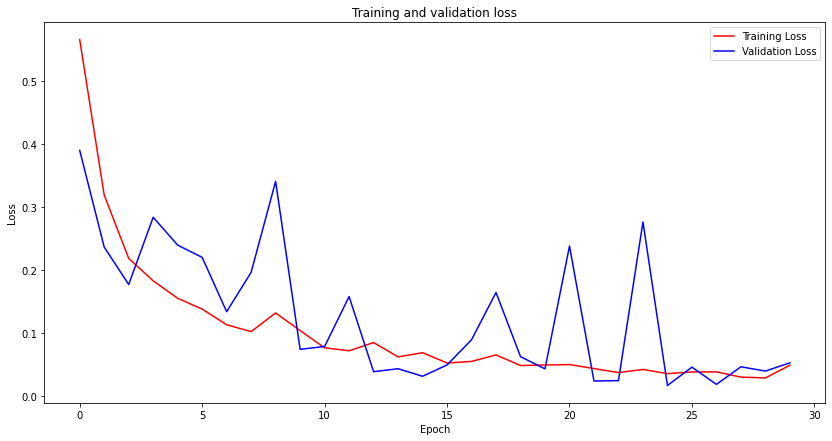

In [14]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

podemos observar que en loss de training a pesar de aveces tener picos por el comienzo estos se reducen al final de epoch, más en el set de vsalidation podemos ver picos muy marcados, por esta razón se ejecutara otros 30 epoch más del modelo

In [36]:
r = model.fit_generator(training_set, validation_data = val_set, epochs = 30, steps_per_epoch = len(training_set), validation_steps = len(val_set))

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
469/469 [==============================] - 298s 636ms/step - loss: 0.0261 - accuracy: 0.9905 - val_loss: 0.0298 - val_accuracy: 0.9910
Epoch 2/30
469/469 [==============================] - 302s 643ms/step - loss: 0.0257 - accuracy: 0.9911 - val_loss: 0.0390 - val_accuracy: 0.9872
Epoch 3/30
469/469 [==============================] - 298s 635ms/step - loss: 0.0409 - accuracy: 0.9878 - val_loss: 0.0172 - val_accuracy: 0.9934
Epoch 4/30
469/469 [==============================] - 297s 633ms/step - loss: 0.0272 - accuracy: 0.9912 - val_loss: 0.0169 - val_accuracy: 0.9944
Epoch 5/30
469/469 [==============================] - 297s 633ms/step - loss: 0.0280 - accuracy: 0.9907 - val_loss: 0.0329 - val_accuracy: 0.9908
Epoch 6/30
469/469 [==============================] - 296s 631ms/step - loss: 0.0238 - accuracy: 0.9911 - val_loss: 0.0273 - val_accuracy: 0.9920
Epoch 7/30
469/469 [==============================] - 296s 630ms/step - loss: 0.0148 - accuracy: 0.9942 - val_loss: 0.0175 -

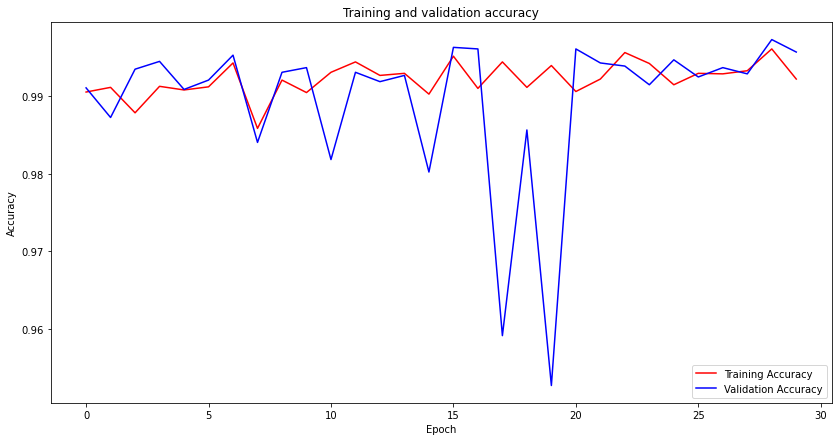

In [37]:
import matplotlib.pyplot as plt
acc=r.history['accuracy']
val_acc=r.history['val_accuracy']
loss=r.history['loss']
val_loss=r.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

podemos observar que el accuracy del validation tiene picos de caida de su accuracy muy marcados entre el epoch 5 y 20.

Text(0.5, 1.0, 'Training and validation loss')

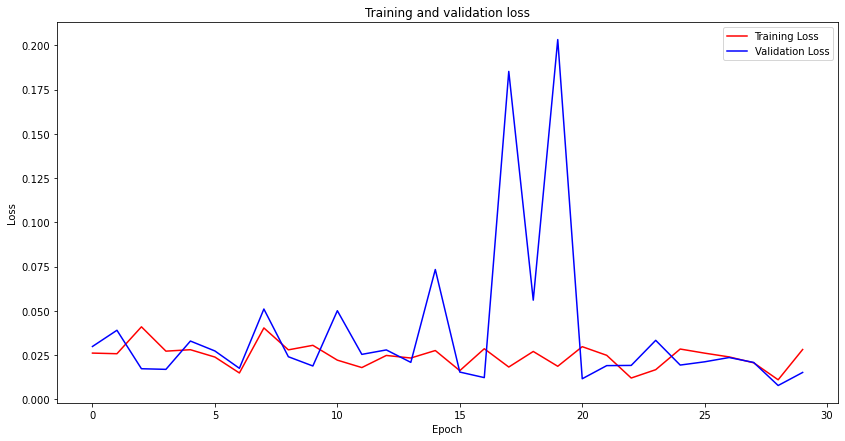

In [38]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

podemos observar que su loss crece entre el epoch 5 y 20, normalizandose entre el epoch 20 y 30

In [56]:
#vemos el test que contiene las carpetas
test_set = val_datagen.flow_from_directory("dataset_lung_colon/test/", target_size = (224, 224), batch_size = 32, class_mode = "categorical")
y_pred = model.predict(test_set)
y_pred

Found 5000 images belonging to 5 classes.


array([[2.3323680e-13, 3.7821391e-25, 7.7100657e-07, 1.9520562e-23,
        9.9999928e-01],
       [1.0000000e+00, 1.9297488e-09, 7.2983312e-12, 2.1023547e-21,
        5.8337462e-17],
       [3.7704217e-07, 7.6308737e-14, 9.9967778e-01, 6.0966045e-07,
        3.2128888e-04],
       ...,
       [3.1840947e-04, 9.9967515e-01, 1.4293840e-06, 4.9741802e-06,
        3.0192387e-11],
       [9.7986130e-10, 8.3142001e-17, 5.3177722e-05, 5.2591055e-17,
        9.9994683e-01],
       [6.2963586e-08, 8.7165639e-17, 1.1254560e-05, 2.4946878e-19,
        9.9998868e-01]], dtype=float32)

# Matriz de confusion con test_set

In [74]:
#escrivir en el csv el nombre de las imagenes con sus clases
import os
import csv
path = 'dataset_lung_colon/test_cnf/'

with open('colon_lung_test.csv', 'w',newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(['Image_id','labels'])
  for root, dirs, files in os.walk(path):
    for filename in files:
        if filename.find("colonca") != -1:
            writer.writerow([filename, '0'])
        elif filename.find("colonn") != -1:
            writer.writerow([filename, '1'])
        elif filename.find('lungaca') != -1:
            writer.writerow([filename, '2'])
        elif filename.find('lungn') != -1:
            writer.writerow([filename, '3'])
        elif filename.find('lungscc') != -1:
            writer.writerow([filename, '4'])

In [86]:
import numpy as np

def preprocess_image(path):
    img = image.load_img(path, target_size = (224, 224))
    a = image.img_to_array(img)
    a /= 255.
    a = np.expand_dims(a, axis = 0)
 
    return a

In [87]:
import pandas as pd
## ver que tan bien clasifica las imagenes del test
test_images_dir = 'dataset_lung_colon/test_cnf/'
test_df = pd.read_csv('colon_lung_test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('test_colon_lung_CNN.npy', test_preprocessed_images)


dataset_lung_colon/test_cnf/colonca1003.jpeg
dataset_lung_colon/test_cnf/colonca101.jpeg
dataset_lung_colon/test_cnf/colonca1011.jpeg
dataset_lung_colon/test_cnf/colonca1012.jpeg
dataset_lung_colon/test_cnf/colonca1025.jpeg
dataset_lung_colon/test_cnf/colonca1033.jpeg
dataset_lung_colon/test_cnf/colonca1034.jpeg
dataset_lung_colon/test_cnf/colonca1037.jpeg
dataset_lung_colon/test_cnf/colonca1046.jpeg
dataset_lung_colon/test_cnf/colonca1047.jpeg
dataset_lung_colon/test_cnf/colonca1049.jpeg
dataset_lung_colon/test_cnf/colonca1051.jpeg
dataset_lung_colon/test_cnf/colonca1052.jpeg
dataset_lung_colon/test_cnf/colonca1060.jpeg
dataset_lung_colon/test_cnf/colonca1061.jpeg
dataset_lung_colon/test_cnf/colonca1072.jpeg
dataset_lung_colon/test_cnf/colonca1086.jpeg
dataset_lung_colon/test_cnf/colonca1096.jpeg
dataset_lung_colon/test_cnf/colonca1099.jpeg
dataset_lung_colon/test_cnf/colonca1118.jpeg
dataset_lung_colon/test_cnf/colonca1119.jpeg
dataset_lung_colon/test_cnf/colonca1125.jpeg
dataset_lun

dataset_lung_colon/test_cnf/colonca19.jpeg
dataset_lung_colon/test_cnf/colonca1900.jpeg
dataset_lung_colon/test_cnf/colonca1903.jpeg
dataset_lung_colon/test_cnf/colonca1904.jpeg
dataset_lung_colon/test_cnf/colonca1905.jpeg
dataset_lung_colon/test_cnf/colonca1910.jpeg
dataset_lung_colon/test_cnf/colonca1911.jpeg
dataset_lung_colon/test_cnf/colonca1914.jpeg
dataset_lung_colon/test_cnf/colonca1925.jpeg
dataset_lung_colon/test_cnf/colonca1926.jpeg
dataset_lung_colon/test_cnf/colonca193.jpeg
dataset_lung_colon/test_cnf/colonca1934.jpeg
dataset_lung_colon/test_cnf/colonca194.jpeg
dataset_lung_colon/test_cnf/colonca1940.jpeg
dataset_lung_colon/test_cnf/colonca1946.jpeg
dataset_lung_colon/test_cnf/colonca1949.jpeg
dataset_lung_colon/test_cnf/colonca1956.jpeg
dataset_lung_colon/test_cnf/colonca1957.jpeg
dataset_lung_colon/test_cnf/colonca1962.jpeg
dataset_lung_colon/test_cnf/colonca1969.jpeg
dataset_lung_colon/test_cnf/colonca1979.jpeg
dataset_lung_colon/test_cnf/colonca1983.jpeg
dataset_lung_c

dataset_lung_colon/test_cnf/colonca2772.jpeg
dataset_lung_colon/test_cnf/colonca2776.jpeg
dataset_lung_colon/test_cnf/colonca2779.jpeg
dataset_lung_colon/test_cnf/colonca2787.jpeg
dataset_lung_colon/test_cnf/colonca2795.jpeg
dataset_lung_colon/test_cnf/colonca280.jpeg
dataset_lung_colon/test_cnf/colonca2800.jpeg
dataset_lung_colon/test_cnf/colonca2809.jpeg
dataset_lung_colon/test_cnf/colonca2810.jpeg
dataset_lung_colon/test_cnf/colonca2814.jpeg
dataset_lung_colon/test_cnf/colonca2823.jpeg
dataset_lung_colon/test_cnf/colonca2836.jpeg
dataset_lung_colon/test_cnf/colonca2846.jpeg
dataset_lung_colon/test_cnf/colonca2847.jpeg
dataset_lung_colon/test_cnf/colonca2848.jpeg
dataset_lung_colon/test_cnf/colonca2852.jpeg
dataset_lung_colon/test_cnf/colonca2856.jpeg
dataset_lung_colon/test_cnf/colonca2858.jpeg
dataset_lung_colon/test_cnf/colonca286.jpeg
dataset_lung_colon/test_cnf/colonca2870.jpeg
dataset_lung_colon/test_cnf/colonca2874.jpeg
dataset_lung_colon/test_cnf/colonca2881.jpeg
dataset_lung

dataset_lung_colon/test_cnf/colonca3657.jpeg
dataset_lung_colon/test_cnf/colonca3662.jpeg
dataset_lung_colon/test_cnf/colonca3670.jpeg
dataset_lung_colon/test_cnf/colonca3681.jpeg
dataset_lung_colon/test_cnf/colonca3686.jpeg
dataset_lung_colon/test_cnf/colonca3693.jpeg
dataset_lung_colon/test_cnf/colonca3708.jpeg
dataset_lung_colon/test_cnf/colonca3714.jpeg
dataset_lung_colon/test_cnf/colonca3722.jpeg
dataset_lung_colon/test_cnf/colonca3728.jpeg
dataset_lung_colon/test_cnf/colonca3729.jpeg
dataset_lung_colon/test_cnf/colonca3734.jpeg
dataset_lung_colon/test_cnf/colonca3743.jpeg
dataset_lung_colon/test_cnf/colonca3746.jpeg
dataset_lung_colon/test_cnf/colonca3750.jpeg
dataset_lung_colon/test_cnf/colonca3754.jpeg
dataset_lung_colon/test_cnf/colonca3759.jpeg
dataset_lung_colon/test_cnf/colonca3761.jpeg
dataset_lung_colon/test_cnf/colonca3765.jpeg
dataset_lung_colon/test_cnf/colonca3766.jpeg
dataset_lung_colon/test_cnf/colonca3769.jpeg
dataset_lung_colon/test_cnf/colonca3778.jpeg
dataset_lu

dataset_lung_colon/test_cnf/colonca4556.jpeg
dataset_lung_colon/test_cnf/colonca4570.jpeg
dataset_lung_colon/test_cnf/colonca4574.jpeg
dataset_lung_colon/test_cnf/colonca4575.jpeg
dataset_lung_colon/test_cnf/colonca4576.jpeg
dataset_lung_colon/test_cnf/colonca4583.jpeg
dataset_lung_colon/test_cnf/colonca4585.jpeg
dataset_lung_colon/test_cnf/colonca459.jpeg
dataset_lung_colon/test_cnf/colonca4591.jpeg
dataset_lung_colon/test_cnf/colonca4594.jpeg
dataset_lung_colon/test_cnf/colonca4600.jpeg
dataset_lung_colon/test_cnf/colonca4601.jpeg
dataset_lung_colon/test_cnf/colonca4608.jpeg
dataset_lung_colon/test_cnf/colonca4609.jpeg
dataset_lung_colon/test_cnf/colonca4611.jpeg
dataset_lung_colon/test_cnf/colonca4619.jpeg
dataset_lung_colon/test_cnf/colonca4621.jpeg
dataset_lung_colon/test_cnf/colonca4622.jpeg
dataset_lung_colon/test_cnf/colonca4624.jpeg
dataset_lung_colon/test_cnf/colonca4628.jpeg
dataset_lung_colon/test_cnf/colonca4629.jpeg
dataset_lung_colon/test_cnf/colonca4631.jpeg
dataset_lun

dataset_lung_colon/test_cnf/colonca902.jpeg
dataset_lung_colon/test_cnf/colonca903.jpeg
dataset_lung_colon/test_cnf/colonca906.jpeg
dataset_lung_colon/test_cnf/colonca919.jpeg
dataset_lung_colon/test_cnf/colonca92.jpeg
dataset_lung_colon/test_cnf/colonca920.jpeg
dataset_lung_colon/test_cnf/colonca921.jpeg
dataset_lung_colon/test_cnf/colonca932.jpeg
dataset_lung_colon/test_cnf/colonca933.jpeg
dataset_lung_colon/test_cnf/colonca934.jpeg
dataset_lung_colon/test_cnf/colonca938.jpeg
dataset_lung_colon/test_cnf/colonca940.jpeg
dataset_lung_colon/test_cnf/colonca941.jpeg
dataset_lung_colon/test_cnf/colonca946.jpeg
dataset_lung_colon/test_cnf/colonca948.jpeg
dataset_lung_colon/test_cnf/colonca95.jpeg
dataset_lung_colon/test_cnf/colonca956.jpeg
dataset_lung_colon/test_cnf/colonca961.jpeg
dataset_lung_colon/test_cnf/colonca962.jpeg
dataset_lung_colon/test_cnf/colonca967.jpeg
dataset_lung_colon/test_cnf/colonca972.jpeg
dataset_lung_colon/test_cnf/colonca975.jpeg
dataset_lung_colon/test_cnf/colonc

dataset_lung_colon/test_cnf/colonn1796.jpeg
dataset_lung_colon/test_cnf/colonn1799.jpeg
dataset_lung_colon/test_cnf/colonn1808.jpeg
dataset_lung_colon/test_cnf/colonn1815.jpeg
dataset_lung_colon/test_cnf/colonn1818.jpeg
dataset_lung_colon/test_cnf/colonn1822.jpeg
dataset_lung_colon/test_cnf/colonn1823.jpeg
dataset_lung_colon/test_cnf/colonn183.jpeg
dataset_lung_colon/test_cnf/colonn1835.jpeg
dataset_lung_colon/test_cnf/colonn1838.jpeg
dataset_lung_colon/test_cnf/colonn1843.jpeg
dataset_lung_colon/test_cnf/colonn1848.jpeg
dataset_lung_colon/test_cnf/colonn1849.jpeg
dataset_lung_colon/test_cnf/colonn1850.jpeg
dataset_lung_colon/test_cnf/colonn1855.jpeg
dataset_lung_colon/test_cnf/colonn1858.jpeg
dataset_lung_colon/test_cnf/colonn1861.jpeg
dataset_lung_colon/test_cnf/colonn1863.jpeg
dataset_lung_colon/test_cnf/colonn1874.jpeg
dataset_lung_colon/test_cnf/colonn1881.jpeg
dataset_lung_colon/test_cnf/colonn1884.jpeg
dataset_lung_colon/test_cnf/colonn1893.jpeg
dataset_lung_colon/test_cnf/colon

dataset_lung_colon/test_cnf/colonn267.jpeg
dataset_lung_colon/test_cnf/colonn2670.jpeg
dataset_lung_colon/test_cnf/colonn2674.jpeg
dataset_lung_colon/test_cnf/colonn2679.jpeg
dataset_lung_colon/test_cnf/colonn2684.jpeg
dataset_lung_colon/test_cnf/colonn2687.jpeg
dataset_lung_colon/test_cnf/colonn269.jpeg
dataset_lung_colon/test_cnf/colonn270.jpeg
dataset_lung_colon/test_cnf/colonn271.jpeg
dataset_lung_colon/test_cnf/colonn2719.jpeg
dataset_lung_colon/test_cnf/colonn2720.jpeg
dataset_lung_colon/test_cnf/colonn2721.jpeg
dataset_lung_colon/test_cnf/colonn2723.jpeg
dataset_lung_colon/test_cnf/colonn2724.jpeg
dataset_lung_colon/test_cnf/colonn2734.jpeg
dataset_lung_colon/test_cnf/colonn2740.jpeg
dataset_lung_colon/test_cnf/colonn2741.jpeg
dataset_lung_colon/test_cnf/colonn2748.jpeg
dataset_lung_colon/test_cnf/colonn2750.jpeg
dataset_lung_colon/test_cnf/colonn2751.jpeg
dataset_lung_colon/test_cnf/colonn2754.jpeg
dataset_lung_colon/test_cnf/colonn2759.jpeg
dataset_lung_colon/test_cnf/colonn27

dataset_lung_colon/test_cnf/colonn3480.jpeg
dataset_lung_colon/test_cnf/colonn3484.jpeg
dataset_lung_colon/test_cnf/colonn3489.jpeg
dataset_lung_colon/test_cnf/colonn3498.jpeg
dataset_lung_colon/test_cnf/colonn3499.jpeg
dataset_lung_colon/test_cnf/colonn3500.jpeg
dataset_lung_colon/test_cnf/colonn3504.jpeg
dataset_lung_colon/test_cnf/colonn3509.jpeg
dataset_lung_colon/test_cnf/colonn3511.jpeg
dataset_lung_colon/test_cnf/colonn3513.jpeg
dataset_lung_colon/test_cnf/colonn3517.jpeg
dataset_lung_colon/test_cnf/colonn352.jpeg
dataset_lung_colon/test_cnf/colonn3520.jpeg
dataset_lung_colon/test_cnf/colonn3527.jpeg
dataset_lung_colon/test_cnf/colonn3530.jpeg
dataset_lung_colon/test_cnf/colonn3533.jpeg
dataset_lung_colon/test_cnf/colonn3534.jpeg
dataset_lung_colon/test_cnf/colonn3536.jpeg
dataset_lung_colon/test_cnf/colonn3537.jpeg
dataset_lung_colon/test_cnf/colonn3538.jpeg
dataset_lung_colon/test_cnf/colonn354.jpeg
dataset_lung_colon/test_cnf/colonn3542.jpeg
dataset_lung_colon/test_cnf/colonn

dataset_lung_colon/test_cnf/colonn4351.jpeg
dataset_lung_colon/test_cnf/colonn4368.jpeg
dataset_lung_colon/test_cnf/colonn437.jpeg
dataset_lung_colon/test_cnf/colonn4370.jpeg
dataset_lung_colon/test_cnf/colonn4377.jpeg
dataset_lung_colon/test_cnf/colonn4378.jpeg
dataset_lung_colon/test_cnf/colonn4379.jpeg
dataset_lung_colon/test_cnf/colonn4382.jpeg
dataset_lung_colon/test_cnf/colonn4383.jpeg
dataset_lung_colon/test_cnf/colonn4389.jpeg
dataset_lung_colon/test_cnf/colonn4390.jpeg
dataset_lung_colon/test_cnf/colonn4391.jpeg
dataset_lung_colon/test_cnf/colonn44.jpeg
dataset_lung_colon/test_cnf/colonn4401.jpeg
dataset_lung_colon/test_cnf/colonn4406.jpeg
dataset_lung_colon/test_cnf/colonn4416.jpeg
dataset_lung_colon/test_cnf/colonn4418.jpeg
dataset_lung_colon/test_cnf/colonn4420.jpeg
dataset_lung_colon/test_cnf/colonn4421.jpeg
dataset_lung_colon/test_cnf/colonn4422.jpeg
dataset_lung_colon/test_cnf/colonn4429.jpeg
dataset_lung_colon/test_cnf/colonn4438.jpeg
dataset_lung_colon/test_cnf/colonn4

dataset_lung_colon/test_cnf/colonn804.jpeg
dataset_lung_colon/test_cnf/colonn805.jpeg
dataset_lung_colon/test_cnf/colonn806.jpeg
dataset_lung_colon/test_cnf/colonn807.jpeg
dataset_lung_colon/test_cnf/colonn812.jpeg
dataset_lung_colon/test_cnf/colonn813.jpeg
dataset_lung_colon/test_cnf/colonn818.jpeg
dataset_lung_colon/test_cnf/colonn82.jpeg
dataset_lung_colon/test_cnf/colonn827.jpeg
dataset_lung_colon/test_cnf/colonn829.jpeg
dataset_lung_colon/test_cnf/colonn83.jpeg
dataset_lung_colon/test_cnf/colonn837.jpeg
dataset_lung_colon/test_cnf/colonn840.jpeg
dataset_lung_colon/test_cnf/colonn841.jpeg
dataset_lung_colon/test_cnf/colonn843.jpeg
dataset_lung_colon/test_cnf/colonn854.jpeg
dataset_lung_colon/test_cnf/colonn859.jpeg
dataset_lung_colon/test_cnf/colonn86.jpeg
dataset_lung_colon/test_cnf/colonn866.jpeg
dataset_lung_colon/test_cnf/colonn870.jpeg
dataset_lung_colon/test_cnf/colonn875.jpeg
dataset_lung_colon/test_cnf/colonn876.jpeg
dataset_lung_colon/test_cnf/colonn880.jpeg
dataset_lung_c

dataset_lung_colon/test_cnf/lungaca1615.jpeg
dataset_lung_colon/test_cnf/lungaca1624.jpeg
dataset_lung_colon/test_cnf/lungaca1631.jpeg
dataset_lung_colon/test_cnf/lungaca1634.jpeg
dataset_lung_colon/test_cnf/lungaca1635.jpeg
dataset_lung_colon/test_cnf/lungaca1637.jpeg
dataset_lung_colon/test_cnf/lungaca164.jpeg
dataset_lung_colon/test_cnf/lungaca1641.jpeg
dataset_lung_colon/test_cnf/lungaca1642.jpeg
dataset_lung_colon/test_cnf/lungaca1646.jpeg
dataset_lung_colon/test_cnf/lungaca1647.jpeg
dataset_lung_colon/test_cnf/lungaca1649.jpeg
dataset_lung_colon/test_cnf/lungaca1653.jpeg
dataset_lung_colon/test_cnf/lungaca1662.jpeg
dataset_lung_colon/test_cnf/lungaca1677.jpeg
dataset_lung_colon/test_cnf/lungaca1687.jpeg
dataset_lung_colon/test_cnf/lungaca169.jpeg
dataset_lung_colon/test_cnf/lungaca1693.jpeg
dataset_lung_colon/test_cnf/lungaca1696.jpeg
dataset_lung_colon/test_cnf/lungaca1698.jpeg
dataset_lung_colon/test_cnf/lungaca1703.jpeg
dataset_lung_colon/test_cnf/lungaca1709.jpeg
dataset_lung

dataset_lung_colon/test_cnf/lungaca2502.jpeg
dataset_lung_colon/test_cnf/lungaca2504.jpeg
dataset_lung_colon/test_cnf/lungaca2514.jpeg
dataset_lung_colon/test_cnf/lungaca2516.jpeg
dataset_lung_colon/test_cnf/lungaca2519.jpeg
dataset_lung_colon/test_cnf/lungaca252.jpeg
dataset_lung_colon/test_cnf/lungaca2531.jpeg
dataset_lung_colon/test_cnf/lungaca2551.jpeg
dataset_lung_colon/test_cnf/lungaca2552.jpeg
dataset_lung_colon/test_cnf/lungaca2553.jpeg
dataset_lung_colon/test_cnf/lungaca2555.jpeg
dataset_lung_colon/test_cnf/lungaca2561.jpeg
dataset_lung_colon/test_cnf/lungaca2564.jpeg
dataset_lung_colon/test_cnf/lungaca2576.jpeg
dataset_lung_colon/test_cnf/lungaca2581.jpeg
dataset_lung_colon/test_cnf/lungaca2582.jpeg
dataset_lung_colon/test_cnf/lungaca2600.jpeg
dataset_lung_colon/test_cnf/lungaca2602.jpeg
dataset_lung_colon/test_cnf/lungaca2604.jpeg
dataset_lung_colon/test_cnf/lungaca2605.jpeg
dataset_lung_colon/test_cnf/lungaca2609.jpeg
dataset_lung_colon/test_cnf/lungaca2621.jpeg
dataset_lun

dataset_lung_colon/test_cnf/lungaca3432.jpeg
dataset_lung_colon/test_cnf/lungaca3434.jpeg
dataset_lung_colon/test_cnf/lungaca3438.jpeg
dataset_lung_colon/test_cnf/lungaca3441.jpeg
dataset_lung_colon/test_cnf/lungaca3443.jpeg
dataset_lung_colon/test_cnf/lungaca3444.jpeg
dataset_lung_colon/test_cnf/lungaca3447.jpeg
dataset_lung_colon/test_cnf/lungaca3457.jpeg
dataset_lung_colon/test_cnf/lungaca3460.jpeg
dataset_lung_colon/test_cnf/lungaca3465.jpeg
dataset_lung_colon/test_cnf/lungaca3466.jpeg
dataset_lung_colon/test_cnf/lungaca3471.jpeg
dataset_lung_colon/test_cnf/lungaca3475.jpeg
dataset_lung_colon/test_cnf/lungaca3494.jpeg
dataset_lung_colon/test_cnf/lungaca3495.jpeg
dataset_lung_colon/test_cnf/lungaca35.jpeg
dataset_lung_colon/test_cnf/lungaca3500.jpeg
dataset_lung_colon/test_cnf/lungaca3511.jpeg
dataset_lung_colon/test_cnf/lungaca3514.jpeg
dataset_lung_colon/test_cnf/lungaca352.jpeg
dataset_lung_colon/test_cnf/lungaca3527.jpeg
dataset_lung_colon/test_cnf/lungaca3534.jpeg
dataset_lung_

dataset_lung_colon/test_cnf/lungaca4312.jpeg
dataset_lung_colon/test_cnf/lungaca4322.jpeg
dataset_lung_colon/test_cnf/lungaca4331.jpeg
dataset_lung_colon/test_cnf/lungaca4333.jpeg
dataset_lung_colon/test_cnf/lungaca4335.jpeg
dataset_lung_colon/test_cnf/lungaca4339.jpeg
dataset_lung_colon/test_cnf/lungaca4349.jpeg
dataset_lung_colon/test_cnf/lungaca4351.jpeg
dataset_lung_colon/test_cnf/lungaca4357.jpeg
dataset_lung_colon/test_cnf/lungaca4358.jpeg
dataset_lung_colon/test_cnf/lungaca4363.jpeg
dataset_lung_colon/test_cnf/lungaca4376.jpeg
dataset_lung_colon/test_cnf/lungaca4385.jpeg
dataset_lung_colon/test_cnf/lungaca4387.jpeg
dataset_lung_colon/test_cnf/lungaca4388.jpeg
dataset_lung_colon/test_cnf/lungaca4401.jpeg
dataset_lung_colon/test_cnf/lungaca4403.jpeg
dataset_lung_colon/test_cnf/lungaca441.jpeg
dataset_lung_colon/test_cnf/lungaca4412.jpeg
dataset_lung_colon/test_cnf/lungaca4416.jpeg
dataset_lung_colon/test_cnf/lungaca4419.jpeg
dataset_lung_colon/test_cnf/lungaca4421.jpeg
dataset_lun

dataset_lung_colon/test_cnf/lungaca678.jpeg
dataset_lung_colon/test_cnf/lungaca68.jpeg
dataset_lung_colon/test_cnf/lungaca696.jpeg
dataset_lung_colon/test_cnf/lungaca697.jpeg
dataset_lung_colon/test_cnf/lungaca698.jpeg
dataset_lung_colon/test_cnf/lungaca701.jpeg
dataset_lung_colon/test_cnf/lungaca71.jpeg
dataset_lung_colon/test_cnf/lungaca713.jpeg
dataset_lung_colon/test_cnf/lungaca719.jpeg
dataset_lung_colon/test_cnf/lungaca720.jpeg
dataset_lung_colon/test_cnf/lungaca721.jpeg
dataset_lung_colon/test_cnf/lungaca722.jpeg
dataset_lung_colon/test_cnf/lungaca725.jpeg
dataset_lung_colon/test_cnf/lungaca734.jpeg
dataset_lung_colon/test_cnf/lungaca745.jpeg
dataset_lung_colon/test_cnf/lungaca749.jpeg
dataset_lung_colon/test_cnf/lungaca757.jpeg
dataset_lung_colon/test_cnf/lungaca763.jpeg
dataset_lung_colon/test_cnf/lungaca764.jpeg
dataset_lung_colon/test_cnf/lungaca769.jpeg
dataset_lung_colon/test_cnf/lungaca770.jpeg
dataset_lung_colon/test_cnf/lungaca774.jpeg
dataset_lung_colon/test_cnf/lungac

dataset_lung_colon/test_cnf/lungn1552.jpeg
dataset_lung_colon/test_cnf/lungn1554.jpeg
dataset_lung_colon/test_cnf/lungn1560.jpeg
dataset_lung_colon/test_cnf/lungn1562.jpeg
dataset_lung_colon/test_cnf/lungn1566.jpeg
dataset_lung_colon/test_cnf/lungn1572.jpeg
dataset_lung_colon/test_cnf/lungn1573.jpeg
dataset_lung_colon/test_cnf/lungn1575.jpeg
dataset_lung_colon/test_cnf/lungn1582.jpeg
dataset_lung_colon/test_cnf/lungn1588.jpeg
dataset_lung_colon/test_cnf/lungn1590.jpeg
dataset_lung_colon/test_cnf/lungn1606.jpeg
dataset_lung_colon/test_cnf/lungn1607.jpeg
dataset_lung_colon/test_cnf/lungn1610.jpeg
dataset_lung_colon/test_cnf/lungn1612.jpeg
dataset_lung_colon/test_cnf/lungn1622.jpeg
dataset_lung_colon/test_cnf/lungn1624.jpeg
dataset_lung_colon/test_cnf/lungn1628.jpeg
dataset_lung_colon/test_cnf/lungn1630.jpeg
dataset_lung_colon/test_cnf/lungn1633.jpeg
dataset_lung_colon/test_cnf/lungn1634.jpeg
dataset_lung_colon/test_cnf/lungn1636.jpeg
dataset_lung_colon/test_cnf/lungn1643.jpeg
dataset_lun

dataset_lung_colon/test_cnf/lungn2454.jpeg
dataset_lung_colon/test_cnf/lungn2457.jpeg
dataset_lung_colon/test_cnf/lungn2477.jpeg
dataset_lung_colon/test_cnf/lungn2483.jpeg
dataset_lung_colon/test_cnf/lungn2488.jpeg
dataset_lung_colon/test_cnf/lungn2492.jpeg
dataset_lung_colon/test_cnf/lungn2493.jpeg
dataset_lung_colon/test_cnf/lungn2496.jpeg
dataset_lung_colon/test_cnf/lungn2497.jpeg
dataset_lung_colon/test_cnf/lungn2501.jpeg
dataset_lung_colon/test_cnf/lungn2505.jpeg
dataset_lung_colon/test_cnf/lungn2508.jpeg
dataset_lung_colon/test_cnf/lungn2515.jpeg
dataset_lung_colon/test_cnf/lungn2518.jpeg
dataset_lung_colon/test_cnf/lungn2522.jpeg
dataset_lung_colon/test_cnf/lungn2527.jpeg
dataset_lung_colon/test_cnf/lungn2528.jpeg
dataset_lung_colon/test_cnf/lungn2533.jpeg
dataset_lung_colon/test_cnf/lungn2534.jpeg
dataset_lung_colon/test_cnf/lungn2535.jpeg
dataset_lung_colon/test_cnf/lungn2540.jpeg
dataset_lung_colon/test_cnf/lungn2541.jpeg
dataset_lung_colon/test_cnf/lungn2546.jpeg
dataset_lun

dataset_lung_colon/test_cnf/lungn3424.jpeg
dataset_lung_colon/test_cnf/lungn3425.jpeg
dataset_lung_colon/test_cnf/lungn343.jpeg
dataset_lung_colon/test_cnf/lungn3430.jpeg
dataset_lung_colon/test_cnf/lungn3431.jpeg
dataset_lung_colon/test_cnf/lungn3435.jpeg
dataset_lung_colon/test_cnf/lungn3437.jpeg
dataset_lung_colon/test_cnf/lungn3440.jpeg
dataset_lung_colon/test_cnf/lungn3445.jpeg
dataset_lung_colon/test_cnf/lungn3455.jpeg
dataset_lung_colon/test_cnf/lungn3458.jpeg
dataset_lung_colon/test_cnf/lungn3465.jpeg
dataset_lung_colon/test_cnf/lungn3468.jpeg
dataset_lung_colon/test_cnf/lungn3469.jpeg
dataset_lung_colon/test_cnf/lungn3478.jpeg
dataset_lung_colon/test_cnf/lungn3480.jpeg
dataset_lung_colon/test_cnf/lungn3484.jpeg
dataset_lung_colon/test_cnf/lungn3488.jpeg
dataset_lung_colon/test_cnf/lungn349.jpeg
dataset_lung_colon/test_cnf/lungn3491.jpeg
dataset_lung_colon/test_cnf/lungn3492.jpeg
dataset_lung_colon/test_cnf/lungn3502.jpeg
dataset_lung_colon/test_cnf/lungn3519.jpeg
dataset_lung_

dataset_lung_colon/test_cnf/lungn4314.jpeg
dataset_lung_colon/test_cnf/lungn4316.jpeg
dataset_lung_colon/test_cnf/lungn4318.jpeg
dataset_lung_colon/test_cnf/lungn4320.jpeg
dataset_lung_colon/test_cnf/lungn4325.jpeg
dataset_lung_colon/test_cnf/lungn434.jpeg
dataset_lung_colon/test_cnf/lungn4341.jpeg
dataset_lung_colon/test_cnf/lungn4349.jpeg
dataset_lung_colon/test_cnf/lungn4354.jpeg
dataset_lung_colon/test_cnf/lungn436.jpeg
dataset_lung_colon/test_cnf/lungn4360.jpeg
dataset_lung_colon/test_cnf/lungn4361.jpeg
dataset_lung_colon/test_cnf/lungn4367.jpeg
dataset_lung_colon/test_cnf/lungn437.jpeg
dataset_lung_colon/test_cnf/lungn4376.jpeg
dataset_lung_colon/test_cnf/lungn4377.jpeg
dataset_lung_colon/test_cnf/lungn4382.jpeg
dataset_lung_colon/test_cnf/lungn4385.jpeg
dataset_lung_colon/test_cnf/lungn4391.jpeg
dataset_lung_colon/test_cnf/lungn4396.jpeg
dataset_lung_colon/test_cnf/lungn4406.jpeg
dataset_lung_colon/test_cnf/lungn4413.jpeg
dataset_lung_colon/test_cnf/lungn4420.jpeg
dataset_lung_c

dataset_lung_colon/test_cnf/lungn790.jpeg
dataset_lung_colon/test_cnf/lungn793.jpeg
dataset_lung_colon/test_cnf/lungn794.jpeg
dataset_lung_colon/test_cnf/lungn8.jpeg
dataset_lung_colon/test_cnf/lungn80.jpeg
dataset_lung_colon/test_cnf/lungn804.jpeg
dataset_lung_colon/test_cnf/lungn809.jpeg
dataset_lung_colon/test_cnf/lungn811.jpeg
dataset_lung_colon/test_cnf/lungn818.jpeg
dataset_lung_colon/test_cnf/lungn82.jpeg
dataset_lung_colon/test_cnf/lungn820.jpeg
dataset_lung_colon/test_cnf/lungn824.jpeg
dataset_lung_colon/test_cnf/lungn83.jpeg
dataset_lung_colon/test_cnf/lungn831.jpeg
dataset_lung_colon/test_cnf/lungn84.jpeg
dataset_lung_colon/test_cnf/lungn841.jpeg
dataset_lung_colon/test_cnf/lungn847.jpeg
dataset_lung_colon/test_cnf/lungn848.jpeg
dataset_lung_colon/test_cnf/lungn851.jpeg
dataset_lung_colon/test_cnf/lungn853.jpeg
dataset_lung_colon/test_cnf/lungn861.jpeg
dataset_lung_colon/test_cnf/lungn875.jpeg
dataset_lung_colon/test_cnf/lungn876.jpeg
dataset_lung_colon/test_cnf/lungn882.jpe

dataset_lung_colon/test_cnf/lungscc1661.jpeg
dataset_lung_colon/test_cnf/lungscc1674.jpeg
dataset_lung_colon/test_cnf/lungscc1679.jpeg
dataset_lung_colon/test_cnf/lungscc1680.jpeg
dataset_lung_colon/test_cnf/lungscc1685.jpeg
dataset_lung_colon/test_cnf/lungscc1686.jpeg
dataset_lung_colon/test_cnf/lungscc1692.jpeg
dataset_lung_colon/test_cnf/lungscc1699.jpeg
dataset_lung_colon/test_cnf/lungscc1701.jpeg
dataset_lung_colon/test_cnf/lungscc1706.jpeg
dataset_lung_colon/test_cnf/lungscc1715.jpeg
dataset_lung_colon/test_cnf/lungscc1716.jpeg
dataset_lung_colon/test_cnf/lungscc1718.jpeg
dataset_lung_colon/test_cnf/lungscc1719.jpeg
dataset_lung_colon/test_cnf/lungscc172.jpeg
dataset_lung_colon/test_cnf/lungscc1720.jpeg
dataset_lung_colon/test_cnf/lungscc173.jpeg
dataset_lung_colon/test_cnf/lungscc1734.jpeg
dataset_lung_colon/test_cnf/lungscc1739.jpeg
dataset_lung_colon/test_cnf/lungscc174.jpeg
dataset_lung_colon/test_cnf/lungscc1746.jpeg
dataset_lung_colon/test_cnf/lungscc1748.jpeg
dataset_lung_

dataset_lung_colon/test_cnf/lungscc2571.jpeg
dataset_lung_colon/test_cnf/lungscc2580.jpeg
dataset_lung_colon/test_cnf/lungscc2581.jpeg
dataset_lung_colon/test_cnf/lungscc2584.jpeg
dataset_lung_colon/test_cnf/lungscc2589.jpeg
dataset_lung_colon/test_cnf/lungscc2593.jpeg
dataset_lung_colon/test_cnf/lungscc2598.jpeg
dataset_lung_colon/test_cnf/lungscc260.jpeg
dataset_lung_colon/test_cnf/lungscc2609.jpeg
dataset_lung_colon/test_cnf/lungscc2610.jpeg
dataset_lung_colon/test_cnf/lungscc2616.jpeg
dataset_lung_colon/test_cnf/lungscc262.jpeg
dataset_lung_colon/test_cnf/lungscc2621.jpeg
dataset_lung_colon/test_cnf/lungscc2622.jpeg
dataset_lung_colon/test_cnf/lungscc2629.jpeg
dataset_lung_colon/test_cnf/lungscc2633.jpeg
dataset_lung_colon/test_cnf/lungscc2637.jpeg
dataset_lung_colon/test_cnf/lungscc2638.jpeg
dataset_lung_colon/test_cnf/lungscc2642.jpeg
dataset_lung_colon/test_cnf/lungscc2644.jpeg
dataset_lung_colon/test_cnf/lungscc2648.jpeg
dataset_lung_colon/test_cnf/lungscc2649.jpeg
dataset_lung

dataset_lung_colon/test_cnf/lungscc3364.jpeg
dataset_lung_colon/test_cnf/lungscc3369.jpeg
dataset_lung_colon/test_cnf/lungscc3375.jpeg
dataset_lung_colon/test_cnf/lungscc3376.jpeg
dataset_lung_colon/test_cnf/lungscc3387.jpeg
dataset_lung_colon/test_cnf/lungscc3391.jpeg
dataset_lung_colon/test_cnf/lungscc3395.jpeg
dataset_lung_colon/test_cnf/lungscc3399.jpeg
dataset_lung_colon/test_cnf/lungscc3400.jpeg
dataset_lung_colon/test_cnf/lungscc3405.jpeg
dataset_lung_colon/test_cnf/lungscc3409.jpeg
dataset_lung_colon/test_cnf/lungscc3412.jpeg
dataset_lung_colon/test_cnf/lungscc3418.jpeg
dataset_lung_colon/test_cnf/lungscc3420.jpeg
dataset_lung_colon/test_cnf/lungscc3430.jpeg
dataset_lung_colon/test_cnf/lungscc3431.jpeg
dataset_lung_colon/test_cnf/lungscc3435.jpeg
dataset_lung_colon/test_cnf/lungscc3436.jpeg
dataset_lung_colon/test_cnf/lungscc3439.jpeg
dataset_lung_colon/test_cnf/lungscc3442.jpeg
dataset_lung_colon/test_cnf/lungscc3445.jpeg
dataset_lung_colon/test_cnf/lungscc3450.jpeg
dataset_lu

dataset_lung_colon/test_cnf/lungscc4308.jpeg
dataset_lung_colon/test_cnf/lungscc431.jpeg
dataset_lung_colon/test_cnf/lungscc4310.jpeg
dataset_lung_colon/test_cnf/lungscc4314.jpeg
dataset_lung_colon/test_cnf/lungscc4315.jpeg
dataset_lung_colon/test_cnf/lungscc4323.jpeg
dataset_lung_colon/test_cnf/lungscc4325.jpeg
dataset_lung_colon/test_cnf/lungscc4327.jpeg
dataset_lung_colon/test_cnf/lungscc4331.jpeg
dataset_lung_colon/test_cnf/lungscc4334.jpeg
dataset_lung_colon/test_cnf/lungscc4336.jpeg
dataset_lung_colon/test_cnf/lungscc4340.jpeg
dataset_lung_colon/test_cnf/lungscc4341.jpeg
dataset_lung_colon/test_cnf/lungscc4347.jpeg
dataset_lung_colon/test_cnf/lungscc4348.jpeg
dataset_lung_colon/test_cnf/lungscc4350.jpeg
dataset_lung_colon/test_cnf/lungscc4359.jpeg
dataset_lung_colon/test_cnf/lungscc4361.jpeg
dataset_lung_colon/test_cnf/lungscc4362.jpeg
dataset_lung_colon/test_cnf/lungscc4364.jpeg
dataset_lung_colon/test_cnf/lungscc437.jpeg
dataset_lung_colon/test_cnf/lungscc4373.jpeg
dataset_lung

dataset_lung_colon/test_cnf/lungscc731.jpeg
dataset_lung_colon/test_cnf/lungscc733.jpeg
dataset_lung_colon/test_cnf/lungscc735.jpeg
dataset_lung_colon/test_cnf/lungscc736.jpeg
dataset_lung_colon/test_cnf/lungscc741.jpeg
dataset_lung_colon/test_cnf/lungscc749.jpeg
dataset_lung_colon/test_cnf/lungscc75.jpeg
dataset_lung_colon/test_cnf/lungscc753.jpeg
dataset_lung_colon/test_cnf/lungscc755.jpeg
dataset_lung_colon/test_cnf/lungscc764.jpeg
dataset_lung_colon/test_cnf/lungscc765.jpeg
dataset_lung_colon/test_cnf/lungscc767.jpeg
dataset_lung_colon/test_cnf/lungscc77.jpeg
dataset_lung_colon/test_cnf/lungscc772.jpeg
dataset_lung_colon/test_cnf/lungscc773.jpeg
dataset_lung_colon/test_cnf/lungscc775.jpeg
dataset_lung_colon/test_cnf/lungscc777.jpeg
dataset_lung_colon/test_cnf/lungscc784.jpeg
dataset_lung_colon/test_cnf/lungscc786.jpeg
dataset_lung_colon/test_cnf/lungscc787.jpeg
dataset_lung_colon/test_cnf/lungscc790.jpeg
dataset_lung_colon/test_cnf/lungscc80.jpeg
dataset_lung_colon/test_cnf/lungscc

FileNotFoundError: [Errno 2] No such file or directory: '/content/test_colon_lung_CNN.npy'

In [88]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

5000/5000 [==============================] - 40s 8ms/step
[0 0 0 ... 4 4 4]


In [89]:
test_df = pd.read_csv('colon_lung_test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0       0
1       0
2       0
3       0
4       0
       ..
4995    4
4996    4
4997    4
4998    4
4999    4
Name: labels, Length: 5000, dtype: int64


In [91]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [92]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[ 999,    1,    0,    0,    0],
       [   2,  998,    0,    0,    0],
       [   0,    0,  980,    2,   18],
       [   0,    0,    0, 1000,    0],
       [   0,    0,    2,    0,  998]], dtype=int64)

In [93]:
train_dir = 'dataset_lung_colon/train/'
classes = os.listdir(train_dir)

In [94]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

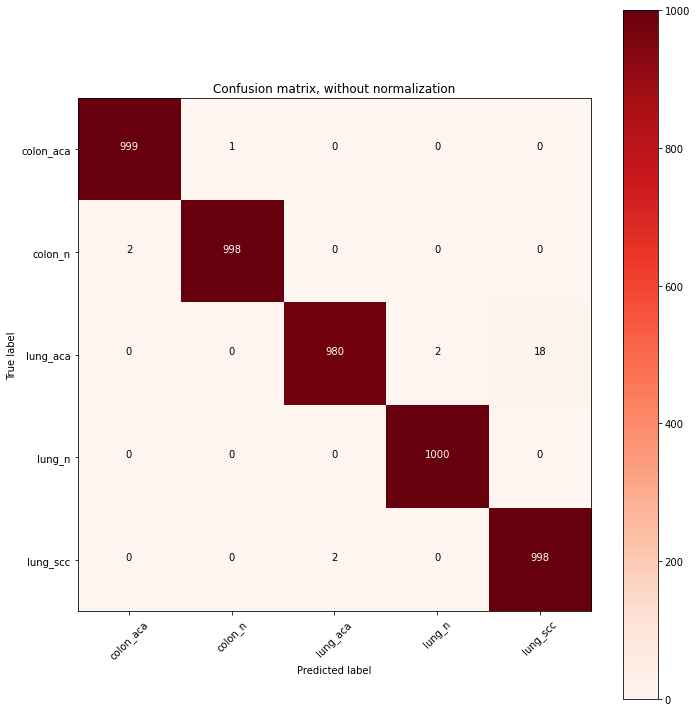

In [96]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(10,10))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()


podemos observar que para colon_aca se logra predecir correctamente 999 de 1000, solo 1 son predichas como colon_n.
Para colon_n se logra predecir 998 correctamente, mas 2 son predichas como colon_aca
Para lung_aca se logra predecir 980 correctamente, 2 se predicen como lung_n y 18 como lung_scc
Para lung_n se logra predecir todas correctamente
Para lung_scc se predice 2 como lung_aca y 998 correctamente.

# Prueba de clasificación de una imagen

In [111]:
img3 = image.load_img("dataset_lung_colon/test_cnf/colonn1970.jpeg", target_size = (224, 224))

In [112]:
y = image.img_to_array(img3)
y

array([[[231., 181., 244.],
        [223., 171., 243.],
        [214., 168., 240.],
        ...,
        [170., 137., 216.],
        [196., 184., 196.],
        [182., 178., 252.]],

       [[223., 171., 243.],
        [211., 159., 233.],
        [217., 170., 242.],
        ...,
        [174., 135., 224.],
        [209., 182., 233.],
        [155., 136., 225.]],

       [[213., 158., 241.],
        [210., 156., 234.],
        [217., 170., 242.],
        ...,
        [162., 121., 213.],
        [200., 165., 247.],
        [133., 108., 192.]],

       ...,

       [[200., 130., 218.],
        [218., 153., 233.],
        [212., 154., 228.],
        ...,
        [224., 211., 229.],
        [222., 182., 244.],
        [226., 191., 255.]],

       [[193., 130., 211.],
        [192., 134., 208.],
        [191., 138., 208.],
        ...,
        [233., 221., 233.],
        [254., 227., 242.],
        [239., 243., 210.]],

       [[194., 141., 221.],
        [194., 144., 215.],
        [202., 1

In [113]:
y = y/255

In [114]:
y = np.expand_dims(y, axis = 0)

In [115]:
model.predict(y)

array([[2.62e-17, 1.00e+00, 3.75e-27, 1.31e-21, 0.00e+00]], dtype=float32)

In [116]:
a = np.argmax(model.predict(y), axis = 1)
a

array([1], dtype=int64)

In [117]:
if (a == 0):
    print("Colon adenocarcinoma")
elif (a == 1):
    print("Colon benign tissue")
elif (a == 2):
    print("Lung adenocarcinoma")
elif (a == 3):
    print("Lung benign tissue")
elif (a == 4):
    print("Lung squamous cell carcinoma")

Colon benign tissue


* colon_aca:Colon adenocarcinoma
* colon_n: Colon benign tissue
* lung_aca:Lung adenocarcinoma
* lung_n:Lung benign tissue
* lung_scc:Lung squamous cell carcinoma

# Guardar modelo

In [60]:
# serializar el modelo a Json
model_json = model.to_json()
with open("cnn_colon_pulmon.json", "w") as json_file:
    json_file.write(model_json)

In [61]:
# guardamos los pesos en HDF5
model.save_weights("cnn_colon_pulmon_weights.h5")

# Cargar Modelo

In [ ]:
#Cargar Modelo
json_file = open("cnn_colon_pulmon.json", "r")
model_json = json_file.read()
json_file.close()
from tensorflow.keras.models import model_from_json
model = model_from_json(model_json)
model.load_weights("cnn_colon_pulmon_weights.h5")

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])